<a href="https://colab.research.google.com/github/sergiobm3/ESI_MachineLearning/blob/NLP/SSJ_Task2_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> We are the SSJ team and this is our work about natural language processing.

---

In [100]:
import io
import pandas as pd
from google.colab import files
import re

## 0. Loading Data

We start by loading the data file that contains the tweets with which the study will work. The file format to upload is CSV.

For this purpose, we use some commands provided by Google Colab itself to access files on our computer.



In [297]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')),sep=',')

df

Saving labeled_data.csv to labeled_data (1).csv
User uploaded file "labeled_data.csv" with length 2546446 bytes


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


3 classes: 0 --> hate speech, 1 --> offensive language, 2 --> neither

# 1. Preprocessing

##Remove unuseful data

In [298]:
pattern = "\"#$%&'()*+, -./:;<=>?@[\]^_`{|}~“”…»’" # Es la variable string.puntuation sin el caracter ! porque lo vemos importante 
def cleanUnusefulData(sentence):
  sentence = sentence.translate(str.maketrans('', '', pattern))
  return sentence
def removeUnusefulExclamation(sentence):
  if sentence[0] == '!':
    sentence = removeUnusefulExclamation(sentence[1:])
  else:
    return sentence
  return sentence

print(cleanUnusefulData("!!!!!!!!!!!!! RT @ShenikaRoberts: The shit yo*"))

!!!!!!!!!!!!!RTShenikaRobertsTheshityo


In [299]:
clean_tweet = []
for t in range(0,len(df)):
  tweet = df.iloc[t]['tweet']
  tweet = removeUnusefulExclamation(tweet)
  clean_tweet.append(tweet)

df['clean_tweet'] = clean_tweet

##Replace emoticons


Lectura de fichero emoticonos.

In [300]:
dict_emoticons = {}
with open('emoticons.txt') as f:
    for linea in f:
      info = linea.split(",")
      #emoticon_code = "&#"+str(info[1])+";"
      emoticon_code = info[0]
      emoticon_word = info[2]
      dict_emoticons[emoticon_code] = emoticon_word[:len(emoticon_word)-1]
print(dict_emoticons)

def replaceEmoticon(word):
  #p = re.compile("&#x[0-9A-Z]+;")
  #s = re.compile("&#128073;&#128076") #sex
  #m = p.findall(word)
  #print(word)
  if word in dict_emoticons:
    word = word.replace(str(word),dict_emoticons[word])
  return word



{'😀': 'smile', '😁': 'smile', '😂': 'laugh', '😃': 'smile', '😄': 'smile', '😆': 'smile', '😉': 'wink', '😊': 'smile', '😒': 'unamused', '😕': 'confused', '😗': 'kiss', '😘': 'kiss', '😙': 'kiss', '😚': 'kiss', '😞': 'dissapointed', '😟': 'worried', '😠': 'angry', '😡': 'angry', '😢': 'sad', '😨': 'frightened', '😪': 'sleepy', '😫': 'tired', '😭': 'sad', '😮': 'surprised', '😯': 'surprised', '😱': 'frightened', '😲': 'astonished', '😳': 'flushed', '😴': 'sleepy', '😵': 'confused', '😶': 'quiet', '🤐': 'quiet', '🤒': 'ill', '🤔': 'thoughtful', '🤡': 'clown', '🤢': 'sucks', '🤣': 'laug'}


##Remove contractions

In [301]:
dict_contractions = {'aren\'t':'are not', 'can\'t':'can not', 'couldn\'t':'could not', 'didn\'t':'did not', 'don\'t':'do not', 'doesn\'t':'does not', 'hadn\'t':'had not',
                       'haven\'t':'have not', 'he\'s':'he is', 'he\'ll':'he will', 'he\'d':'he would', 'here\'s':'here is', 'i\'m':'i am', 'i\'ve':'i have', 'i\'ll':'i will',
                       'i\'d':'i would', 'isn\'t':'is not','it\'s':'it is', 'it\'ll':'it will', 'mustn\'t':'must not', 'she\'s':'she is', 'she\'ll':'she will', 'she\'d':'she would',
                       'shouldn\'t':'should not', 'that\'s':'that is', 'there\'s':'there is', 'they\'re':'they are', 'they\'ve':'they have', 'they\'ll':'they will', 'they\'d':'they would',
                       'they\'d':'they had', 'wasn\'t':'was not', 'we\'re':'we are', 'we\'re':'we are', 'we\'ve':'we have', 'we\'ll':'we will', 'we\'d':'we would', 'weren\'t':'were not', 'what\'s':'what is',
                       'where\'s':'where is', 'who\'s':'who is', 'who\'ll':'who will', 'won\'t':'will not', 'wouldn\'t':'would not', 'you\'re': 'you are', 'you\'ve': 'you have', 
                       'you\'ll':'you will', 'you\'d':'you would', 'y\'all': 'you all', 'could\'ve': 'could have', 'hasn\'t': 'has not', 'let\'s': 'let us'}

def remove_contractions(word):
  return word.replace(word,dict_contractions[word])
  
def is_remove_contractions(word):
  if word in dict_contractions:
    return True    
  else:
    return False

Now the emoticons that we have decided has been changed for text representing the meaning of the emoticon.


## Executing preprocessing

In [302]:
# We create a new dataframe to save result in different columns
df_result = pd.DataFrame()

In [303]:
!pip install tweet-preprocessor

import preprocessor as p
import nltk
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer

p.set_options(p.OPT.EMOJI, p.OPT.URL,p.OPT.HASHTAG, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.ESCAPE_CHAR, p.OPT.RESERVED, p.OPT.NUMBER)
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
# each sentence of tweet
sentences = []
for tweet in df['clean_tweet']:
    word_repeat= ""
    result = tknzr.tokenize(tweet)
    list_token = []
    for word in result:
      
      if word_repeat != word:

        # Cambiar emoticono por texto
        token = replaceEmoticon(word)
        
        # limpiar hastag y menciones
        token = p.clean(token)

        # Cambiar primera letra mayuscula solo si la siguiente es minuscula
        if not token.isupper():
          token = token.lower()
        if token.isupper() and len(token)==1:
          token = token.lower()

        # Cambiar contraciones (you're) por palabra entera
        if is_remove_contractions(token):
          token = remove_contractions(token)
          token = token.split(" ")
          list_token.append(token[0])
          list_token.append(token[1])
        else:
          # limpiar información inútil (",_,...)
          token = cleanUnusefulData(token)
          if(token is not ""):
            list_token.append(token)
            word_repeat = word
      
    sentences.append(list_token)
  #print(result)

df_result['preprocessing_without_emoticons'] = sentences
df_result

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,preprocessing_without_emoticons
0,"[as, a, woman, you, should, not, complain, abo..."
1,"[boy, dats, cold, tyga, dwn, bad, for, cuffin,..."
2,"[dawg, !, you, ever, fuck, a, bitch, and, she,..."
3,"[she, look, like, a, tranny]"
4,"[the, shit, you, hear, about, me, might, be, t..."
...,...
24778,"[yous, a, muthaf, in, lie, right, !, his, TL, ..."
24779,"[you, have, gone, and, broke, the, wrong, hear..."
24780,"[young, buck, wanna, eat, !, dat, nigguh, like..."
24781,"[youu, got, wild, bitches, tellin, you, lies]"


In [304]:
!pip install tweet-preprocessor

import preprocessor as p
import nltk
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer

p.set_options(p.OPT.URL,p.OPT.HASHTAG, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.ESCAPE_CHAR, p.OPT.RESERVED, p.OPT.NUMBER)

tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
# each sentence of tweet
sentences = []
for tweet in df['clean_tweet']:
    word_repeat= ""
    result = tknzr.tokenize(tweet)
    list_token = []
    for word in result:
      
      if word_repeat != word:

        # limpiar hastag y menciones
        token = p.clean(word)

        # Cambiar primera letra mayuscula solo si la siguiente es minuscula
        if not token.isupper():
          token = token.lower()
        if token.isupper() and len(token)==1:
          token = token.lower()

        # Cambiar contraciones (you're) por palabra entera
        if is_remove_contractions(token):
          token = remove_contractions(token)
          token = token.split(" ")
          list_token.append(token[0])
          list_token.append(token[1])
        else:
          # limpiar información inútil (",_,...)
          token = cleanUnusefulData(token)
          if(token is not ""):
            list_token.append(token)
            word_repeat = word
    
    sentences.append(list_token)
  #print(result)

df_result['preprocessing_with_emoticons'] = sentences
df_result

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,preprocessing_without_emoticons,preprocessing_with_emoticons
0,"[as, a, woman, you, should, not, complain, abo...","[as, a, woman, you, should, not, complain, abo..."
1,"[boy, dats, cold, tyga, dwn, bad, for, cuffin,...","[boy, dats, cold, tyga, dwn, bad, for, cuffin,..."
2,"[dawg, !, you, ever, fuck, a, bitch, and, she,...","[dawg, !, you, ever, fuck, a, bitch, and, she,..."
3,"[she, look, like, a, tranny]","[she, look, like, a, tranny]"
4,"[the, shit, you, hear, about, me, might, be, t...","[the, shit, you, hear, about, me, might, be, t..."
...,...,...
24778,"[yous, a, muthaf, in, lie, right, !, his, TL, ...","[yous, a, muthaf, in, lie, right, !, his, TL, ..."
24779,"[you, have, gone, and, broke, the, wrong, hear...","[you, have, gone, and, broke, the, wrong, hear..."
24780,"[young, buck, wanna, eat, !, dat, nigguh, like...","[young, buck, wanna, eat, !, dat, nigguh, like..."
24781,"[youu, got, wild, bitches, tellin, you, lies]","[youu, got, wild, bitches, tellin, you, lies]"


In [ ]:
#Comprobacion emoticonos
print(df.iloc[24778]['tweet'])
print(df_result['preprocessing_with_emoticons'][24778])
print(df_result['preprocessing_without_emoticons'][24778])

print(df.iloc[5]['tweet'])
print(df_result['preprocessing_with_emoticons'][5])
print(df_result['preprocessing_without_emoticons'][5])

In [ ]:
for sentence in range(0,len(df_result)):
  print(df_result['preprocessing_with_emoticons'][sentence])

 [los metodos estan explicados en esta pagina web - How to Write a Spelling Corrector](https://norvig.com/spell-correct.html)

In [146]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('usa2.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [ ]:
correction('nigg')

Cantidad de palabras diferentes y numero de palabras totales. Además se muestra el TOP 10 de la palabra más usada

In [ ]:
print("We can see that there are "+ str(len(WORDS))+ " distinct words, which together appear "+ str(sum(WORDS.values())) +" times.")
print("Words more used: ")
WORDS.most_common(10)

Se han almacenado todas las palabras existentes y ha contado cuantas aparecen repetidas.

In [ ]:
WORDS

##Stop words

In [305]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

english_stops = set(stopwords.words('english'))
clear_sent_emoticon = []
clear_sent_not_emoticon = []
for tweet in range(0,len(df_result['preprocessing_with_emoticons'])):
  clear_sent_emoticon.append([word for word in df_result['preprocessing_with_emoticons'][tweet] if word not in english_stops]) 
  clear_sent_not_emoticon.append([word for word in df_result['preprocessing_without_emoticons'][tweet] if word not in english_stops]) 

df_result['preprocessing_with_emoticons'] = clear_sent_emoticon
df_result['preprocessing_without_emoticons'] = clear_sent_not_emoticon
df_result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,preprocessing_without_emoticons,preprocessing_with_emoticons
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always..."
1,"[boy, dats, cold, tyga, dwn, bad, cuffin, dat,...","[boy, dats, cold, tyga, dwn, bad, cuffin, dat,..."
2,"[dawg, !, ever, fuck, bitch, start, cry, confu...","[dawg, !, ever, fuck, bitch, start, cry, confu..."
3,"[look, like, tranny]","[look, like, tranny]"
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,..."
...,...,...
24778,"[yous, muthaf, lie, right, !, TL, trash, mine,...","[yous, muthaf, lie, right, !, TL, trash, mine,..."
24779,"[gone, broke, wrong, heart, baby, drove, redne...","[gone, broke, wrong, heart, baby, drove, redne..."
24780,"[young, buck, wanna, eat, !, dat, nigguh, like...","[young, buck, wanna, eat, !, dat, nigguh, like..."
24781,"[youu, got, wild, bitches, tellin, lies]","[youu, got, wild, bitches, tellin, lies]"


## Lemmatize all terms

In [306]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
clear_sent_emoticon = []
clear_sent_not_emoticon = []
for tweet in range(0,len(df_result['preprocessing_with_emoticons'])):
  clear_sent_emoticon.append([lemmatizer.lemmatize(word) for word in df_result['preprocessing_with_emoticons'][tweet]])
  clear_sent_not_emoticon.append([lemmatizer.lemmatize(word) for word in df_result['preprocessing_without_emoticons'][tweet]])

df_result['preprocessing_with_emoticons'] = clear_sent_emoticon
df_result['preprocessing_without_emoticons'] = clear_sent_not_emoticon
df_result

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,preprocessing_without_emoticons,preprocessing_with_emoticons
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always..."
1,"[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ..."
2,"[dawg, !, ever, fuck, bitch, start, cry, confu...","[dawg, !, ever, fuck, bitch, start, cry, confu..."
3,"[look, like, tranny]","[look, like, tranny]"
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,..."
...,...,...
24778,"[yous, muthaf, lie, right, !, TL, trash, mine,...","[yous, muthaf, lie, right, !, TL, trash, mine,..."
24779,"[gone, broke, wrong, heart, baby, drove, redne...","[gone, broke, wrong, heart, baby, drove, redne..."
24780,"[young, buck, wanna, eat, !, dat, nigguh, like...","[young, buck, wanna, eat, !, dat, nigguh, like..."
24781,"[youu, got, wild, bitch, tellin, lie]","[youu, got, wild, bitch, tellin, lie]"


# Vectorization

## Destokenizador

To do the vectorization, we have chosen to put back all the tokens that make a sentence. We think that this will make the development of this process easier.

In [347]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

tweets_detokenize_with_emoticon = []
tweets_detokenize_without_emoticon = []

for i in range(0,len(df_result)):
  tweets_detokenize_with_emoticon.append( TreebankWordDetokenizer().detokenize(df_result.iloc[i]['preprocessing_with_emoticons']))
  tweets_detokenize_without_emoticon.append( TreebankWordDetokenizer().detokenize(df_result.iloc[i]['preprocessing_without_emoticons']))

print(len(tweets_detokenize_with_emoticon))
tweets_detokenize_with_emoticon

24783


['woman complain cleaning house man always take trash',
 'boy dat cold tyga dwn bad cuffin dat hoe st place!',
 'dawg! ever fuck bitch start cry confused shit',
 'look like tranny',
 'shit hear might true might faker bitch told ya \ue011',
 'shit blow claim faithful somebody still fucking hoe! 😂',
 'sit HATE another bitch got much shit going!',
 'cause tired big bitch coming u skinny girl!',
 'might get ya bitch back thats',
 'hobby include fighting mariam bitch',
 'keeks bitch curve everyone lol walked conversation like smh',
 'murda gang bitch gang land',
 'hoe smoke loser yea go IG',
 'bad bitch thing like',
 'bitch get',
 'bitch nigga miss',
 'bitch plz whatever',
 'bitch love',
 'bitch get cut everyday b',
 'black bottle bad bitch',
 'broke bitch cant tell nothing',
 'cancel bitch like nino',
 'cant see hoe wont change',
 'fuck bitch dont even suck dick 😂 kermit video bout fuck IG',
 'got ya bitch tip toeing hardwood floor 😂',
 'pussy lip like heaven door 😌',
 'hoe hitting',
 'met

In [348]:
df_result['detokenization_with_emoji'] = tweets_detokenize_with_emoticon
df_result['detokenization_without_emoji'] = tweets_detokenize_without_emoticon

## TFIDF

In order to start using TFIDF, we will first have to create a CountVectorizer to count the number of words (term frequency)

In [344]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1)

X = vectorizer.fit_transform(tweets_detokenize_without_emoticon)

#X_tokens = countvectorizer.get_features_names()

print(X.shape)
print(X.toarray())
print(vectorizer.vocabulary_)
print(X[0])

(24783, 17202)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'woman': 16812, 'complain': 3038, 'cleaning': 2808, 'house': 7173, 'man': 9198, 'always': 416, 'take': 14807, 'trash': 15486, 'boy': 1801, 'dat': 3673, 'cold': 2934, 'tyga': 15736, 'dwn': 4539, 'bad': 994, 'cuffin': 3496, 'hoe': 6995, 'st': 14235, 'place': 11346, 'dawg': 3688, 'ever': 4949, 'fuck': 5776, 'bitch': 1491, 'start': 14294, 'cry': 3468, 'confused': 3114, 'shit': 13429, 'look': 8926, 'like': 8755, 'tranny': 15461, 'hear': 6769, 'might': 9588, 'true': 15597, 'faker': 5137, 'told': 15335, 'ya': 16952, 'blow': 1625, 'claim': 2775, 'faithful': 5132, 'somebody': 13977, 'still': 14385, 'fucking': 5792, 'laugh': 8531, 'sit': 13631, 'hate': 6698, 'another': 546, 'got': 6258, 'much': 9915, 'going': 6201, 'cause': 2382, 'tired': 15277, 'big': 1429, 'coming': 2994, 'skinny': 13674, 'girl': 6115, 'get': 6052, 'back': 971, 'thats': 15051, 'hobby': 6991, '

Cosas que poner antes del codigo que he encontrado en el interne

With Tfidfvectorizer you compute the word counts, idf and tf-idf values all at once. It’s really simple.

With Tfidfvectorizer on the contrary, you will do all three steps at once. Under the hood, it computes the word counts, IDF values, and Tf-idf scores all using the same dataset.

In [345]:
# TF-IDF
# https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/
# https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a
# https://es.ryte.com/wiki/TF*IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1)

X = vectorizer.fit_transform(tweets_detokenize_without_emoticon)

tfidf = X.toarray()

print(X.shape)
print(tfidf)
print(vectorizer.vocabulary_)
print(X[0])


(24783, 17202)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'woman': 16812, 'complain': 3038, 'cleaning': 2808, 'house': 7173, 'man': 9198, 'always': 416, 'take': 14807, 'trash': 15486, 'boy': 1801, 'dat': 3673, 'cold': 2934, 'tyga': 15736, 'dwn': 4539, 'bad': 994, 'cuffin': 3496, 'hoe': 6995, 'st': 14235, 'place': 11346, 'dawg': 3688, 'ever': 4949, 'fuck': 5776, 'bitch': 1491, 'start': 14294, 'cry': 3468, 'confused': 3114, 'shit': 13429, 'look': 8926, 'like': 8755, 'tranny': 15461, 'hear': 6769, 'might': 9588, 'true': 15597, 'faker': 5137, 'told': 15335, 'ya': 16952, 'blow': 1625, 'claim': 2775, 'faithful': 5132, 'somebody': 13977, 'still': 14385, 'fucking': 5792, 'laugh': 8531, 'sit': 13631, 'hate': 6698, 'another': 546, 'got': 6258, 'much': 9915, 'going': 6201, 'cause': 2382, 'tired': 15277, 'big': 1429, 'coming': 2994, 'skinny': 13674, 'girl': 6115, 'get': 6052, 'back': 9

In [ ]:
listaTFIDF = []

for i in range(0,X.shape[0]):
  listaTFIDF.append(X[i])

df_vectorization = pd.DataFrame()

df_vectorization['TFIDF'] = listaTFIDF

hola = df_vectorization.iloc[7]['TFIDF'] # PRIMER TWEET

#print(hola[0].get_shape())

print(hola.getnnz(axis=0))

#print(hola[0][16878])


## TFIDF + N-grams

In [ ]:
df_result.to_csv('df_result.csv')

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=1)
"""f=open("kk.txt","w")
f.write("machacando\n")
f.close()"""

X = vectorizer.fit_transform(tweets_detokenize_without_emoticon)

tfidf = X.toarray()
print(tfidf)
print(vectorizer.vocabulary_)
print (X.shape)

## TFIDF + N-grams + POS tagging

In [ ]:
# Part of Speech Tagging
import nltk
nltk.download('averaged_perceptron_tagger')

listaTweets = []
for tweet in df_result['preprocessing_without_emoticons']:
  listaTweets.append(nltk.pos_tag(tweet))

df_result['POS'] = listaTweets
df_result['POS']

In [ ]:
print(df_result.iloc[1]['POS'])

In [ ]:
# filter nouns
nouns = []
for tweet in df_result['POS']:
  for word in tweet:
    if word[1] == 'NN':
      print("PALABRA SIN CORREGIR:" + word[0])
      print("PALABRA CORREGIDA:" + correction(word[0]))
      nouns.append(word[0])
    nouns.append([word[0] for word in tweet if word[1] == 'NN'])
    
nouns

## TFIDF + N-grams + POS tagging + Other features

### Number  of  words

Para garantizar que estamos contando las palabras de los tweets sin preprocesar, las contamos de df, no de df_result. Lo mismo para el siguiente apartado.

In [321]:
from nltk.tokenize import word_tokenize

listNumberWords = []

#df['tweet'][0]

for i in range(0,len(df['tweet'])):
  #words = df['tweet'][i].split() # OPCIÓN SEVILLA (NO RECOMENDADA)
  words = word_tokenize(df['tweet'][i]) ### ASÍ LO HACE EN EL CUADERNO EL TEACHER
  num_words = len(words)
  listNumberWords.append(num_words)
  #print(num_words)

df_result['number_of_words'] = listNumberWords
df_result['number_of_words']


0        34
1        26
2        35
3        20
4        43
         ..
24778    39
24779    15
24780    17
24781     7
24782    25
Name: number_of_words, Length: 24783, dtype: int64

In [322]:
from nltk.tokenize import sent_tokenize, word_tokenize

listNumberSentences = []

for i in range(0,len(df['tweet'])):
  #sentences = df['tweet'][i].split('.') # OPCIÓN SEVILLA (NO RECOMENDADA)
  sentences = sent_tokenize(df['tweet'][i]) ### ASÍ LO HACE EN EL CUADERNO EL TEACHER
  num_sentences = len(sentences)
  listNumberSentences.append(num_sentences)
  #print(num_sentences)

df_result['number_of_sentences'] = listNumberSentences
df_result['number_of_sentences']

0        3
1        3
2        4
3        2
4        2
        ..
24778    4
24779    1
24780    2
24781    1
24782    2
Name: number_of_sentences, Length: 24783, dtype: int64

In [ ]:
df_result

### Hatred n-gram dictionary

In [ ]:
hatredDF = pd.read_csv('refined_ngram_dict.csv')

In [ ]:
hatredDF

In [ ]:
values = []
for x in range(0,len(df_result)):
  sentence = df_result.iloc[x]['detokenization_without_emoji']
  n = 0
  value = 0
  
  for i in range(0,len(hatredDF)):
    pattern = hatredDF.iloc[i]['ngram']
    result = re.match(pattern,sentence)
    if result is not None:
      n += 1
      value += float(hatredDF.iloc[i]['prophate'])
  if n != 0:
    value = value / n
  values.append(value)
  print("{} and {}".format(value,len(values)))

df_result['hatred_ngrams'] = values

  

###Sentiment analisis

https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

In [358]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_analyzer  = SentimentIntensityAnalyzer() 
sentence = 'hey you fucking bastard'
sentiment = sentiment_analyzer.polarity_scores(sentence)
sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']

negative = []
positive = []
neutral = []
compound = []

for tweet in df_result['detokenization_with_emoji']:
  sentiment = sentiment_analyzer.polarity_scores(tweet)
  negative.append(sentiment['neg'])
  positive.append(sentiment['pos'])
  neutral.append(sentiment['neu'])
  compound.append(sentiment['compound'])

  
#df_result = listaTweets
df_result['Negative'] = negative
df_result['Positive'] = positive
df_result['Neutral'] = neutral
df_result['Compound'] = compound
df_result

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,preprocessing_without_emoticons,preprocessing_with_emoticons,POS,number_of_words,number_of_sentences,detokenization_emoji,detokenization_without_emoji,Negative,Positive,Neutral,Compound,detokenization_with_emoji
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always...","[(woman, NN), (complain, VB), (cleaning, NN), ...",34,3,woman complain cleaning house man always take ...,woman complain cleaning house man always take ...,0.263,0.000,0.737,-0.3612,woman complain cleaning house man always take ...
1,"[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[(boy, NN), (dat, NN), (cold, JJ), (tyga, NN),...",26,3,boy dat cold tyga dwn bad cuffin dat hoe st pl...,boy dat cold tyga dwn bad cuffin dat hoe st pl...,0.275,0.000,0.725,-0.5848,boy dat cold tyga dwn bad cuffin dat hoe st pl...
2,"[dawg, !, ever, fuck, bitch, start, cry, confu...","[dawg, !, ever, fuck, bitch, start, cry, confu...","[(dawg, NN), (!, .), (ever, RB), (fuck, JJ), (...",35,4,dawg! ever fuck bitch start cry confused shit,dawg! ever fuck bitch start cry confused shit,0.847,0.000,0.153,-0.9485,dawg! ever fuck bitch start cry confused shit
3,"[look, like, tranny]","[look, like, tranny]","[(look, NN), (like, IN), (tranny, NN)]",20,2,look like tranny,look like tranny,0.000,0.556,0.444,0.3612,look like tranny
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,...","[(shit, NNS), (hear, JJ), (might, MD), (true, ...",43,2,shit hear might true might faker bitch told ya ,shit hear might true might faker bitch told ya,0.457,0.173,0.370,-0.6808,shit hear might true might faker bitch told ya 
...,...,...,...,...,...,...,...,...,...,...,...,...
24778,"[yous, muthaf, lie, right, !, TL, trash, mine,...","[yous, muthaf, lie, right, !, TL, trash, mine,...","[(yous, JJ), (muthaf, NNS), (lie, RB), (right,...",39,4,yous muthaf lie right! TL trash mine bible scr...,yous muthaf lie right! TL trash mine bible scr...,0.000,0.000,1.000,0.0000,yous muthaf lie right! TL trash mine bible scr...
24779,"[gone, broke, wrong, heart, baby, drove, redne...","[gone, broke, wrong, heart, baby, drove, redne...","[(gone, VBN), (broke, VBD), (wrong, JJ), (hear...",15,1,gone broke wrong heart baby drove redneck crazy,gone broke wrong heart baby drove redneck crazy,0.624,0.000,0.376,-0.8074,gone broke wrong heart baby drove redneck crazy
24780,"[young, buck, wanna, eat, !, dat, nigguh, like...","[young, buck, wanna, eat, !, dat, nigguh, like...","[(young, JJ), (buck, NN), (wanna, JJ), (eat, N...",17,2,young buck wanna eat! dat nigguh like aint fuc...,young buck wanna eat! dat nigguh like aint fuc...,0.000,0.237,0.763,0.4199,young buck wanna eat! dat nigguh like aint fuc...
24781,"[youu, got, wild, bitch, tellin, lie]","[youu, got, wild, bitch, tellin, lie]","[(youu, NN), (got, VBD), (wild, JJ), (bitch, N...",7,1,youu got wild bitch tellin lie,youu got wild bitch tellin lie,0.432,0.000,0.568,-0.5859,youu got wild bitch tellin lie


In [ ]:
df_result.iloc[23]['tweets_detokenize_with_emoticon']

# Select features

In [359]:
# We create a new dataframe to save result in different columns
df_features = pd.DataFrame()

df_features['tweet'] = df['tweet']

df_features['tweets_detokenize_without_emoticon'] = df_result['detokenization_without_emoji']
#df_features['tfidf'] = df_result['tfidf']
#df_features['n-grams'] = df_result['n-grams']
df_features['number_of_words'] = df_result['number_of_words']
df_features['number_of_sentences'] = df_result['number_of_sentences']
df_features['Negative'] = df_result['Negative']
df_features['Positive'] = df_result['Positive']
df_features['Neutral'] = df_result['Neutral']
df_features['Compound'] = df_result['Compound']
df_features['class'] = df['class']

In [ ]:
df_features

In [370]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression, mutual_info_classif
import numpy as np

# Create feature and target variable for Classification problem
X_clf=df_features.iloc[:,2:7] # features: SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'


y_clf=df_features.iloc[:,8] # Target variable: Iris species
print(y_clf)

y_clf = np.where(y_clf == 0,0, y_clf)
y_clf = np.where(y_clf == 1,1, y_clf)
y_clf = np.where(y_clf == 2,2, y_clf)
y_clf = y_clf.astype('int')
print(y_clf)


# k is the number of features you want to select [here it's 2]
X_clf_new=SelectKBest(score_func=mutual_info_classif,k=2).fit_transform(X_clf,y_clf)

# Check the newly created variable for top two best featues
print(X_clf_new)

0        2
1        1
2        1
3        1
4        1
        ..
24778    1
24779    2
24780    1
24781    1
24782    2
Name: class, Length: 24783, dtype: int64
[2 1 1 ... 1 1 2]
[[0.263 0.737]
 [0.275 0.725]
 [0.847 0.153]
 ...
 [0.    0.763]
 [0.432 0.568]
 [0.    0.738]]


# Classification algorithm

In [371]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_features[['Negative','Neutral','class']], test_size=0.3)
train.reset_index(inplace = True)
test.reset_index(inplace = True)

Max Value uniform : 0.7754210325625985 (21)
Max Value distance : 0.771788762219178 (29)


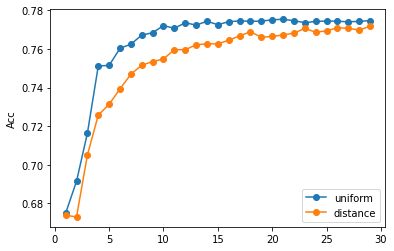

In [372]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

cv = KFold(n_splits = 5, shuffle = True) # shuffle = False si hay dimensión temporal 

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
       for train_fold, test_fold in cv.split(train):
          # División train test aleatoria
          f_train = train.loc[train_fold]
          f_test = train.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['class'], axis=1), 
                               y = f_train['class'])
          y_pred = knn.predict(X = f_test.drop(['class'], axis = 1))
          # evaluación del modelo
          acc = accuracy_score(f_test['class'], y_pred)
          fold_accuracy.append(acc)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
   plt.ylabel('Acc')      
    

plt.legend()
plt.show() 


# 2. Model Execution



Once we have identified the best parameterization we will go on to make an execution of the model and we will graph its results.

In [373]:
# constructor
n_neighbors = 3
weights = 'distance'
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights) 
# fit and predict
knn.fit(X = train[['Negative', 'Neutral']], y = train['class'])
y_pred = knn.predict(X = test[['Negative', 'Neutral']])
acc = accuracy_score(test['class'], y_pred)
print ('Acc', acc)

Acc 0.7420309347679892


We show the solution using Voronoi Diagrams


In [374]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .05  # step size in the mesh

X = train[['Negative', 'Neutral']].values
y = train['class'].values


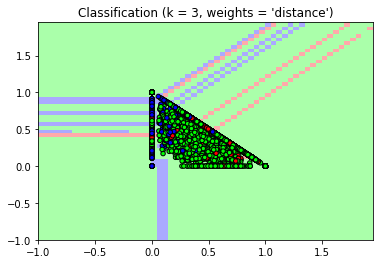

In [375]:

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
             edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()
                         

Finally, we obtain the Confusion Matrix

In [376]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.05104408 0.89559165 0.05336427]
 [0.02826426 0.91884862 0.05288712]
 [0.02506063 0.81649151 0.15844786]]


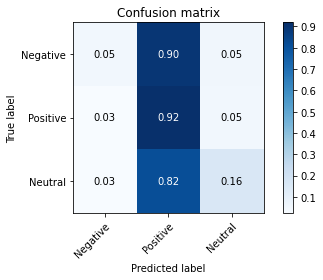

In [379]:
target_name=np.array(['Negative', 'Positive', 'Neutral'], dtype='<U10')
plot_confusion_matrix(test['class'], y_pred, classes=target_name, normalize=True,
                      title='Confusion matrix')
  

# RESTO DE COSAS QUE HEMOS PEGAO


In [ ]:
# Vectorization
# Based on counting

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1)

X = vectorizer.fit_transform(tweets_detokenize)

print(X.toarray())
print(vectorizer.vocabulary_)

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=1)

X = vectorizer.fit_transform(tweets_detokenize)

tfidf = X.toarray()
print(tfidf)
print(vectorizer.vocabulary_)
print (X.shape)

pos_vocab = {v:i for i, v in enumerate(vectorizer.get_feature_names())}

#length
len(pos_vocab)

#pos_vocab
#vectorizer.get_feature_names()

# KEYwORDS
#import numpy

#keywords = [vectorizer.get_feature_names()[numpy.argmax(x)] for x in X.toarray()]
# keywords

## Chunker

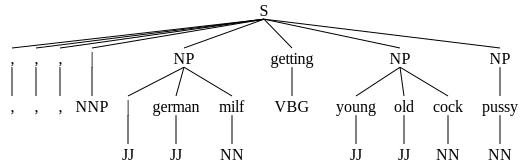

In [ ]:
!pip install svgling
import svgling

#errors are due to tkinter because it is trying to display the tree . # No funciona porque detecta simbolos !?!-~#@ Cuando no halla funcionara bien
'''
chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
chunkParser = nltk.RegexpParser(chunkGram)
for tweet in df['POS']:
  #print(tweet)
  result = chunkParser.parse(tweet)
  #svgling.draw_tree(result)
'''

#sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"), ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]
sentence = df['POS'][900]
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence)
svgling.draw_tree(result)
